<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>


# Before your start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [3]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).


In [4]:
# loading the data: Wholesale customers data
data = pd.read_csv('../data/Wholesale customers data.csv')
data.head()
data.dtypes



Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

- What does each column mean?
- Any categorical data to convert?
- Any missing data to remove?
- Column collinearity - any high correlations?
- Descriptive statistics - any outliers to remove?
- Column-wise data distribution - is the distribution skewed?
- Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.


In [5]:
# Your code here:
data.head()
data.dtypes
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

missing_data = data.isnull().sum()

print(missing_data[missing_data > 0])
correlation_matrix = data.corr()

threshold = 0.8

high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]



Index([], dtype='object')
Series([], dtype: int64)


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.


In [7]:
# Check for missing values in each column
missing_data = data.isnull().sum()

# Print columns with missing data
print(missing_data[missing_data > 0])

Series([], dtype: int64)


**Your comment here**

- ...
- ...


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [_feature scaling_](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

_After scaling your data, assign the transformed data to a new variable `customers_scale`._


In [10]:
# Your import here:
# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

customers_scale = scaler.fit_transform(data)

# Step 4: Convert the scaled data back to a DataFrame if you need to work with it further
customers_scale_df = pd.DataFrame(customers_scale, columns=data.columns)

# Output the scaled data
print(customers_scale_df.head())



    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.


In [12]:
# Step 1: Import the necessary library
from sklearn.cluster import KMeans

# Step 2: Define the number of clusters (let's assume 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)

# Step 3: Fit the KMeans model to the scaled data
kmeans.fit(customers_scale)

# Step 4: Get the cluster labels
labels = kmeans.labels_

# Step 5: Assign these labels back to the original dataset
data['labels'] = labels

# Output the original dataset with the new 'labels' column
print(data.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0  


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Looking to the elbow we can choose 2 like the correct number of clusters


In [15]:
# Step 1: Import the necessary library (if not already done)
from sklearn.cluster import KMeans

# Step 2: Define the KMeans model with 2 clusters based on the elbow method
kmeans = KMeans(n_clusters=2, random_state=42)

# Step 3: Fit the KMeans model to the scaled data
kmeans.fit(customers_scale)

# Step 4: Get the cluster labels
labels = kmeans.labels_

# Step 5: Assign these labels back to the original dataset
data['labels'] = labels

# Output the original dataset with the new 'labels' column
print(data.head())


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       1  
1        1776       1  
2        7844       1  
3        1788       0  
4        5185       1  


Count the values in `labels`.


In [ ]:
# Your code here:

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.


In [17]:

from sklearn.cluster import DBSCAN

# Step 2: Define the DBSCAN model with eps=0.5
dbscan = DBSCAN(eps=0.5)

# Step 3: Fit the DBSCAN model to the scaled data
dbscan.fit(customers_scale)

# Step 4: Get the DBSCAN cluster labels
labels_dbscan = dbscan.labels_

# Step 5: Assign these labels back to the original dataset
data['labels_DBSCAN'] = labels_dbscan

# Output the original dataset with the new 'labels_DBSCAN' column
print(data.head())

# Your code here


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  labels_DBSCAN  
0        1338       1             -1  
1        1776       1             -1  
2        7844       1             -1  
3        1788       0              1  
4        5185       1             -1  


Count the values in `labels_DBSCAN`.


In [26]:
# Your code here


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

- `Detergents_Paper` as X and `Milk` as y
- `Grocery` as X and `Fresh` as y
- `Frozen` as X and `Delicassen` as y


Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively


In [18]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();


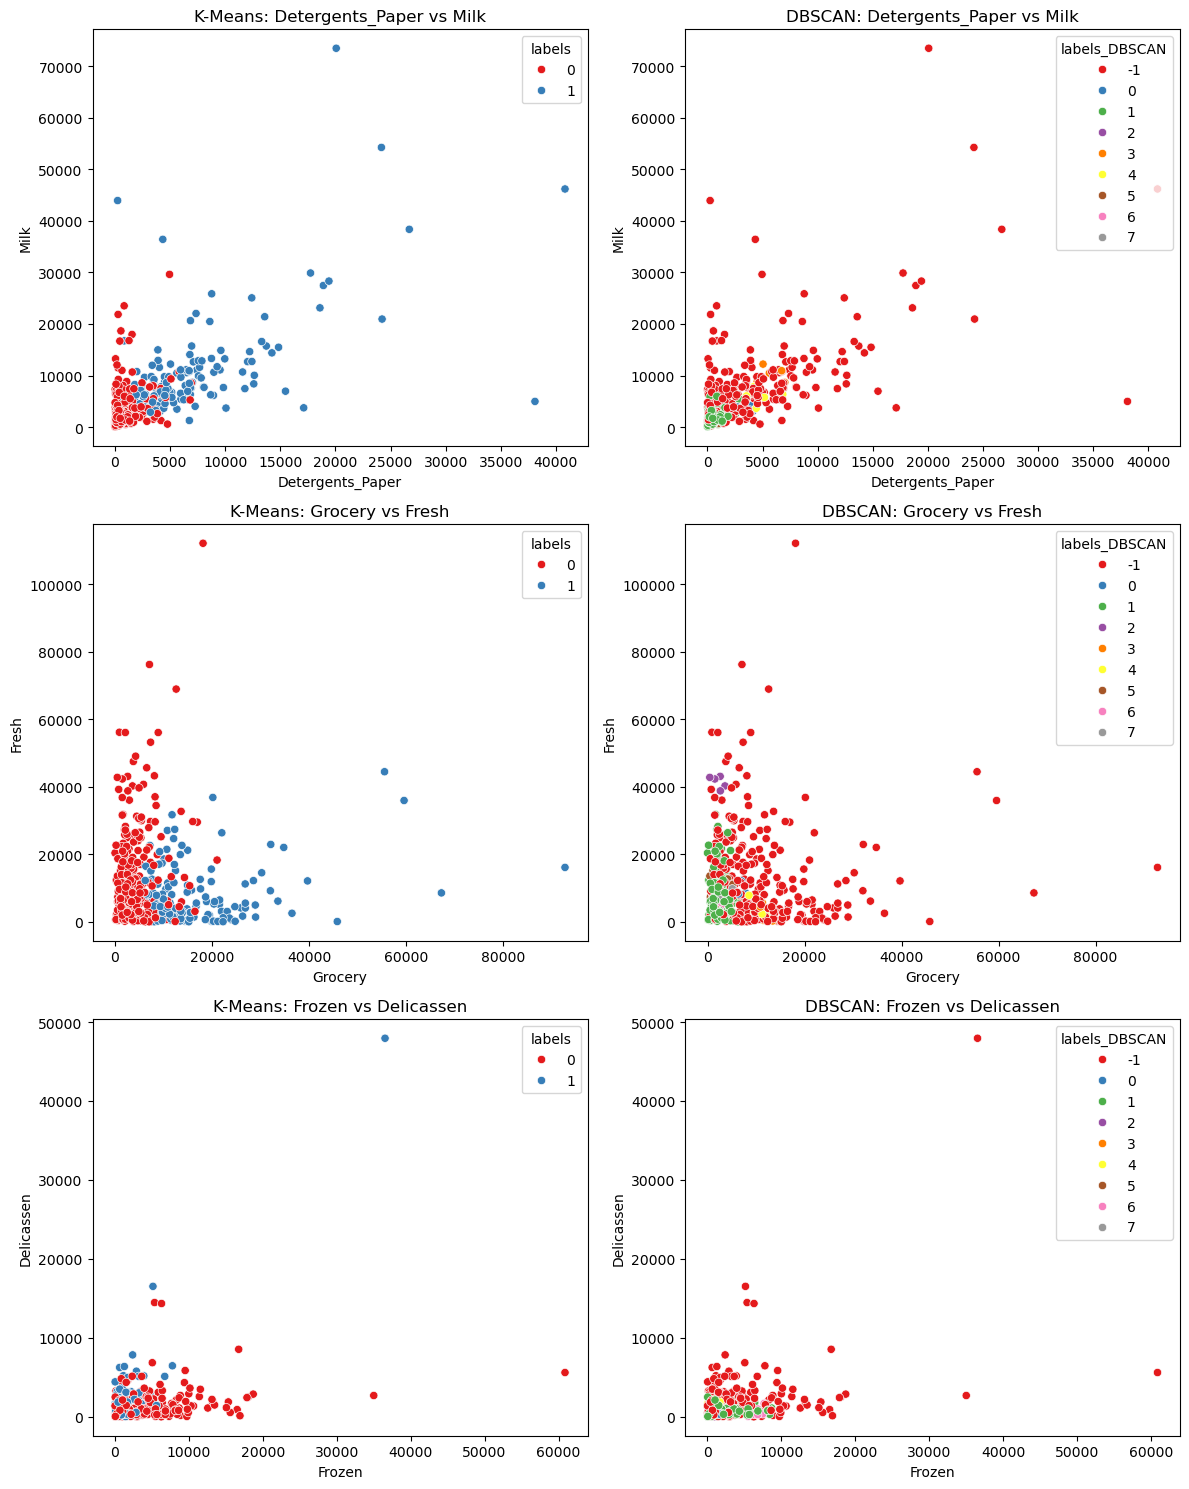

In [20]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set up the plotting environment
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

customers = data

# Column pair 1: Detergents_Paper vs Milk
sns.scatterplot(ax=axes[0, 0], x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels'], palette='Set1')
axes[0, 0].set_title('K-Means: Detergents_Paper vs Milk')

sns.scatterplot(ax=axes[0, 1], x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels_DBSCAN'], palette='Set1')
axes[0, 1].set_title('DBSCAN: Detergents_Paper vs Milk')

# Column pair 2: Grocery vs Fresh
sns.scatterplot(ax=axes[1, 0], x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels'], palette='Set1')
axes[1, 0].set_title('K-Means: Grocery vs Fresh')

sns.scatterplot(ax=axes[1, 1], x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels_DBSCAN'], palette='Set1')
axes[1, 1].set_title('DBSCAN: Grocery vs Fresh')

# Column pair 3: Frozen vs Delicassen
sns.scatterplot(ax=axes[2, 0], x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels'], palette='Set1')
axes[2, 0].set_title('K-Means: Frozen vs Delicassen')

sns.scatterplot(ax=axes[2, 1], x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels_DBSCAN'], palette='Set1')
axes[2, 1].set_title('DBSCAN: Frozen vs Delicassen')

# Step 2: Adjust layout for better visibility
plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively


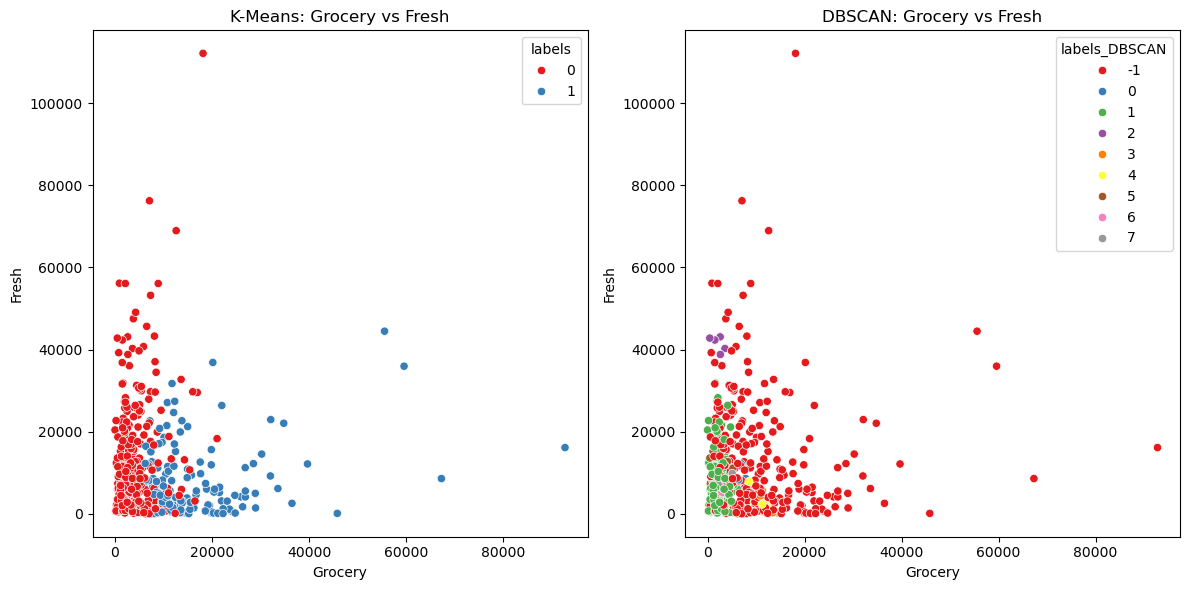

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Grocery vs Fresh for K-Means labels
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels'], palette='Set1')
plt.title('K-Means: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=customers['Grocery'], y=customers['Fresh'], hue=customers['labels_DBSCAN'], palette='Set1')
plt.title('DBSCAN: Grocery vs Fresh')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively


In [ ]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Frozen vs Delicassen for K-Means and DBSCAN labels
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels'], palette='Set1')
plt.title('K-Means: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=customers['Frozen'], y=customers['Delicassen'], hue=customers['labels_DBSCAN'], palette='Set1')
plt.title('DBSCAN: Frozen vs Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# Adjust layout
plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.


In [ ]:
# Your code here:

Which algorithm appears to perform better?


**Your observations here**

-


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?


In [41]:
# Your code here:

**Your comment here**

-


# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.


In [ ]:
# Your code here

**Your comment here**

-
